In [1]:
# Load the module
import lineint

# Helpers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Nice progress bar

import sys
import time

def progressbar(it):
    size = 60
    count = len(it)
    start = time.time() # time estimate start
    def show(j):
        x = int(size*j/count)
        # time estimate calculation and string
        remaining = ((time.time() - start) / j) * (count - j)        
        mins, sec = divmod(remaining, 60) # limited to minutes
        time_str = f"{int(mins):02}:{sec:03.1f}"
        print(f"[{u'█'*x}{('.'*(size-x))}] {j}/{count} Est wait {time_str}", 
              end='\r', file=sys.stdout, flush=True)
    show(0.1) # avoid div/0 
    for i, item in enumerate(it):
        yield item
        show(i+1)
    print("\n", flush=True, file=sys.stdout)
    total_time = time.time() - start
    mins, sec = divmod(total_time, 60) # limited to minutes
    time_str = f"{int(mins):02}:{sec:03.1f}"
    print(f"total time used: {time_str}", flush=True, file=sys.stdout)
    print("\n", flush=True, file=sys.stdout)

# Integrate from grid point to grid point

In [3]:
# Create an input grid of any shape
Lx = 20
Ly = 25
Lz = 28
xmin = -5
ymin = 0
zmin = 2

# Record relative error to plot next
Nplot, error = [], []

# Number of end points tested in each direction
nbr_idx_end = 9 # nbr_idx_end^3 end points calculated

# Try many different resolutions
allNs = np.arange(20, 130, 5)
for Nx in progressbar(allNs):

    # Create an input grid of any shape
    Ny = Nx+3
    Nz = Nx*2

    # Choose starting point indice
    starting_point = [int(Nx/4), int(2*Ny/4), int(3*Nz/4)]

    # Define class with input grid
    xdomain = [xmin, xmin+Lx, Lx/Nx]
    ydomain = [ymin, ymin+Ly, Ly/Ny]
    zdomain = [zmin, zmin+Lz, Lz/Nz]
    li = lineint.LineIntegrate(xdomain, ydomain, zdomain, starting_point)

    # Loop over all the end point indices
    ixrange = [int(i) for i in np.linspace(0, Nx - 1, nbr_idx_end)]
    iyrange = [int(i) for i in np.linspace(0, Ny - 1, nbr_idx_end)]
    izrange = [int(i) for i in np.linspace(0, Nz - 1, nbr_idx_end)]
    for ix in ixrange:
        for iy in iyrange:
            for iz in izrange:

                # Indice of end point
                idx_end = (ix, iy, iz)

                # Calculate segments between start and end indices over input grid
                indices, segments, phi, theta = li.segments_idx_end(idx_end)

                # Calculate distance 
                radius_num = np.sum(segments)

                # Calculate distance between start and end point
                radius_th = li.radius3D_igrid_idx(idx_end)

                # Calculate relative error and record
                error += [abs(radius_num/radius_th - 1)]
                Nplot += [Nx]

[████████████████████████████████████████████████████████████] 22/22 Est wait 00:0.00

total time used: 00:15.2




Text(0, 0.5, '$|R_{num}/R-1|$')

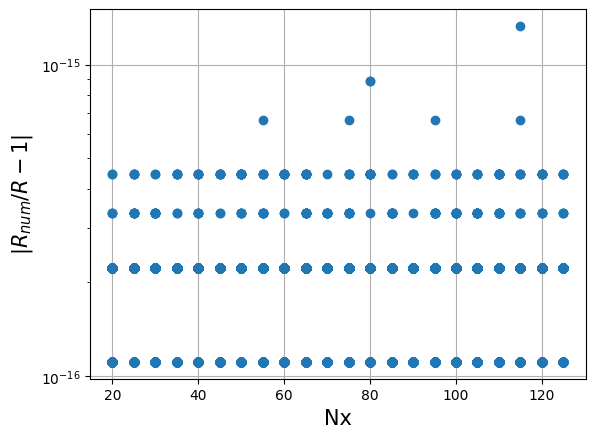

In [4]:
# Plot relative error made during calculation, showing numerical noise
plt.semilogy(Nplot, error, marker = 'o', linewidth = 0)
plt.grid()
plt.xlabel('Nx', fontsize=15)
plt.ylabel(r'$|R_{num}/R-1|$', fontsize=15)

# Integrate from grid point to given radius

In [5]:
# Create an input grid of any shape
Lx = 20
Ly = Lx*1.5
Lz = Lx*2
xmin = -Lx/2
ymin = -Ly/4
zmin = -3*Lz/4

# Record relative error to plot next
Nplot, error = [], []

# Number of angles tested
nbr_angles = 10
# nbr_angles angles of phi between 0 and 2pi
# for each, nbr_angles angles of theta between 0 and pi

# Try different end point radius
# has to be smaller than half the grid size
allradius = [Lx/3, Lx/6, Lx/9]
for radius in allradius:
    print('radius = ', radius)

    # Loop over grid resolution
    allNs = np.arange(20, 130, 3)
    for Nx in progressbar(allNs):
        
        # Create an input grid of any shape
        Ny = int(Nx+5)
        Nz = int(Nx+6)
                    
        # Choose starting point indice
        starting_point = [int(Nx/4), int(2*Ny/4), int(3*Nz/4)]
        
        # Define class
        xdomain = [xmin, xmin+Lx, Lx/Nx]
        ydomain = [ymin, ymin+Ly, Ly/Ny]
        zdomain = [zmin, zmin+Lz, Lz/Nz]
        li = lineint.LineIntegrate(xdomain, ydomain, zdomain, starting_point)
        li.maximum_radius = radius

        # Loop over all angles
        for phi in np.linspace(np.pi, 2*np.pi, nbr_angles):
            for theta in np.linspace(0, np.pi/2, nbr_angles):

                # Calculate segments between start and radius for given angle
                indices, segments = li.segments_radius_end(phi, theta)

                # Calculate distance 
                radius_num = np.sum(segments)
                
                # Calculate relative error and record
                error += [abs(radius_num/radius - 1)]
                Nplot += [Nx]

radius =  6.666666666666667
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.00

total time used: 00:17.1


radius =  3.3333333333333335
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.00

total time used: 00:17.2


radius =  2.2222222222222223
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.00

total time used: 00:17.0




Text(0.5, 0, '$N_x$')

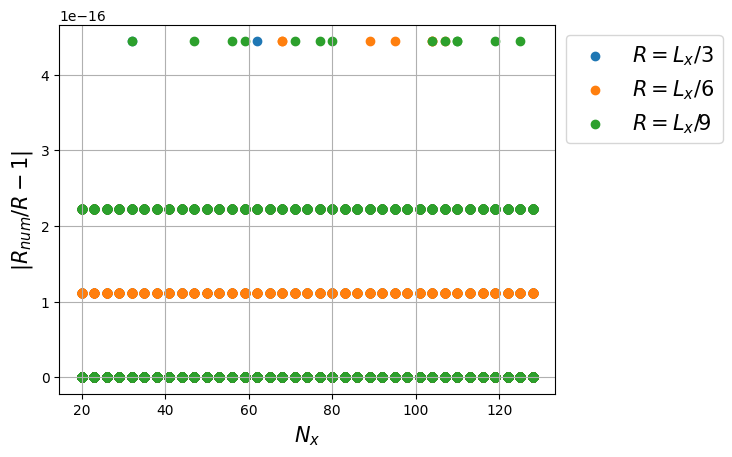

In [6]:
# Plot relative error made during calculation, showing numerical noise
imax = int(len(Nplot)/3)
plt.scatter(Nplot[:imax], error[:imax], label=r'$R=L_x/3$')
plt.scatter(Nplot[imax:2*imax], error[imax:2*imax], label=r'$R=L_x/6$')
plt.scatter(Nplot[2*imax:], error[2*imax:], label=r'$R=L_x/9$')
plt.legend(bbox_to_anchor=(1,1), fontsize=15)
plt.grid()
plt.ylabel(r'$|R_{num}/R - 1|$', fontsize=15)
plt.xlabel(r'$N_x$', fontsize=15)

# Integrate from grid point to boundary

In [7]:
# If the boundary is determined from data, an interpolator is needed
from scipy.interpolate import RegularGridInterpolator

# Create a grid of any shape
Lx = 20
Ly = Lx*1.5
Lz = Lx*2

# Record relative error to plot next
Nplot, error = [], []

# Different types of interpolation methods
interpolation_methods = ["linear", "slinear", "cubic", "quintic", "pchip"]
for im in interpolation_methods:
    print(im)

    # Loop over resolution
    allNs = np.arange(20, 130, 3)
    for Nx in progressbar(allNs):

        # Create an input grid of any shape
        Ny = int(Nx+5)
        Nz = int(Nx+6)

        # Starting point, doesn't matter for this test
        starting_point = [0, 0, 0]
        
        # Define class 
        xdomain = [-Lx/2, Lx/2, Lx/Nx]
        ydomain = [-Ly/2, Ly/2, Ly/Ny]
        zdomain = [-Lz/2, Lz/2, Lz/Nz]
        li = lineint.LineIntegrate(xdomain, ydomain, zdomain, starting_point)

        # Define condition on grid around zero
        x, y, z = np.meshgrid(li.grid0x, li.grid0y, li.grid0z, indexing='ij')
        maximum_radius = Lx/3
        condition = np.sqrt(x**2 + y**2 + z**2) - maximum_radius
    
        # Define interpolation function
        condition_function = RegularGridInterpolator((li.grid0x, li.grid0y, li.grid0z), 
                                                     condition, method=im)

        # Loop over the angles
        nbr_angles = 10
        for phi in np.linspace(np.pi, 2*np.pi, nbr_angles):
            for theta in np.linspace(0, np.pi/2, nbr_angles):

                # Calculate segments between start and condition sign change
                indices, segments = li.segments_conditional_end(phi, theta, condition, 
                                                                condition_function)
                
                # Calculate distance 
                radius_num = np.sum(segments)
                
                # Calculate relative error and record
                error      += [abs(radius_num/maximum_radius - 1)]
                Nplot      += [Nx]

linear
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.00

total time used: 00:4.7


slinear
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.00

total time used: 00:25.1


cubic
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.00

total time used: 00:42.6


quintic
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.04

total time used: 01:50.2


pchip
[████████████████████████████████████████████████████████████] 37/37 Est wait 00:0.01

total time used: 04:16.4




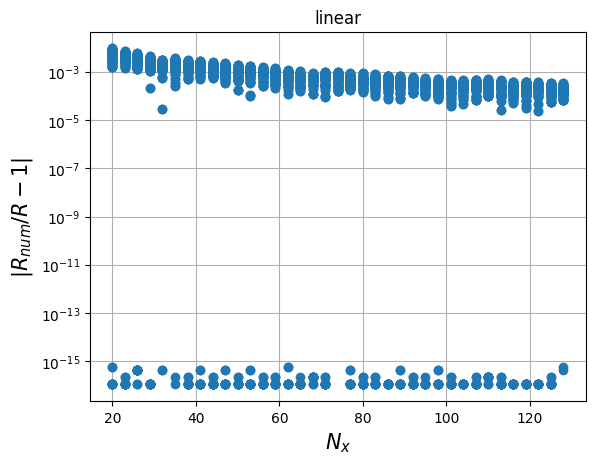

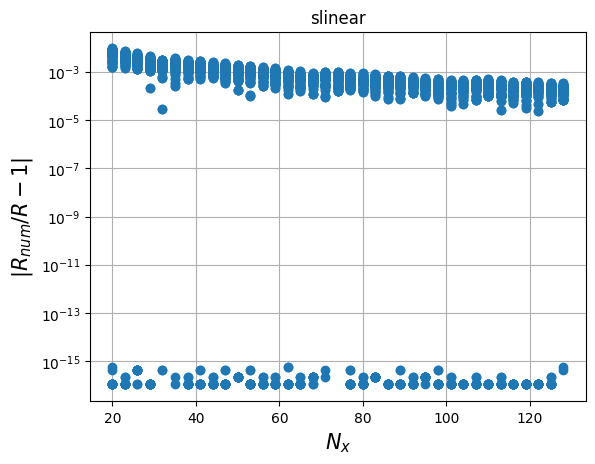

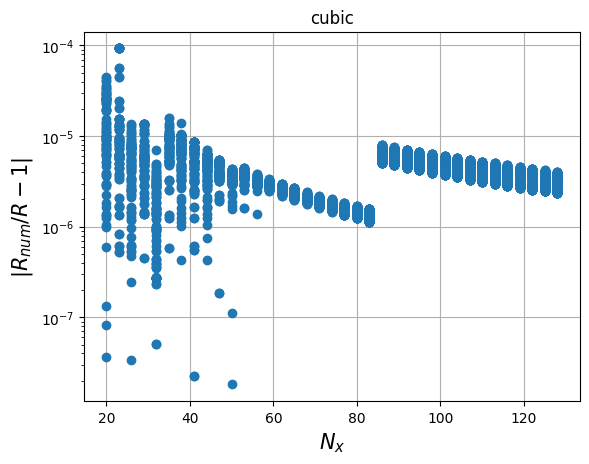

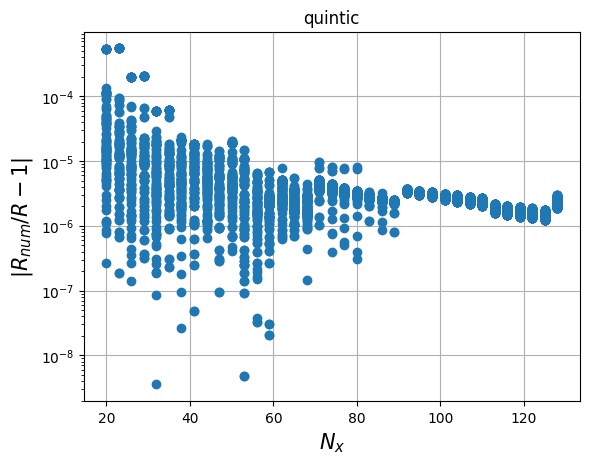

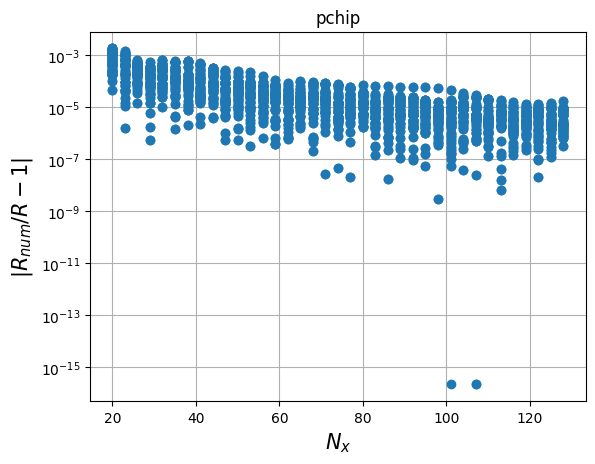

In [8]:
# Plot relative error made during calculation.
# The error here solely comes from the interpolation method
# since segments_radius_end used in the previous test is a wrapper for 
# segments_conditional_end but using the actual condition_function. 
# Based on the tests below, I recommend using cubic for acuracy and time.

imax = int(len(Nplot)/len(interpolation_methods))
for i in range(len(interpolation_methods)):
    plt.figure()
    plt.semilogy(Nplot[i*imax:(i+1)*imax], error[i*imax:(i+1)*imax], 
                 marker='o', linewidth=0)
    plt.title(interpolation_methods[i])
    plt.grid()
    plt.ylabel(r'$|R_{num}/R - 1|$', fontsize=15)
    plt.xlabel(r'$N_x$', fontsize=15)